In [107]:
""""Data cleaning/visualization for ODF Fire Data Sonification.

Myriah Hodgson, MUS 479, 5/14/24"""

# Imports for working with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Load the data, look through the column names to see what is interesting to plot.
fires = pd.read_csv('ODF_FireData.csv')
column_names = list(fires.columns.values)
column_names

['Serial',
 'FireCategory',
 'FireYear',
 'Area',
 'DistrictName',
 'UnitName',
 'FullFireNumber',
 'FireName',
 'Size_class',
 'EstTotalAcres',
 'Protected_Acres',
 'HumanOrLightning',
 'CauseBy',
 'GeneralCause',
 'SpecificCause',
 'Cause_Comments',
 'Lat_DD',
 'Long_DD',
 'LatLongDD',
 'FO_LandOwnType',
 'Twn',
 'Rng',
 'Sec',
 'Subdiv',
 'LandmarkLocation',
 'County',
 'RegUseZone',
 'RegUseRestriction',
 'Industrial_Restriction',
 'Ign_DateTime',
 'ReportDateTime',
 'Discover_DateTime',
 'Control_DateTime',
 'CreationDate',
 'ModifiedDate',
 'DistrictCode',
 'UnitCode',
 'DistFireNumber']

In [109]:
# Look at the data
fires

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014


In [110]:
# Split datasets into what was caused by humans vs what was caused by lightning
human = fires[fires['HumanOrLightning'] == 'Human']
lightning = fires[fires['HumanOrLightning'] == 'Lightning']

In [111]:
# Make smaller dataframes, grouping by the year and summing the estimated total sum of acres for that year
human = human.groupby("FireYear")['EstTotalAcres'].sum()
light = lightning.groupby("FireYear")['EstTotalAcres'].sum()

In [112]:
# create a new df with these two series to load into a new csv file that we can sonify
dict = {'Human': human, 'Lightning': light}
acres = pd.DataFrame(data=dict, index=human.index)

# Send the new df to a csv in order to sonify !
acres.to_csv('fire.csv')

,Human,Lightning
FireYear,,
2000,16060.46,97278.51
2001,9746.79,66247.44
2002,7470.37,1251026.20
2003,14654.94,108736.48
2004,6182.56,236.42
2005,11565.14,59689.17
2006,1696.63,118680.91
2007,52357.36,319260.37
2008,2791.76,14426.03


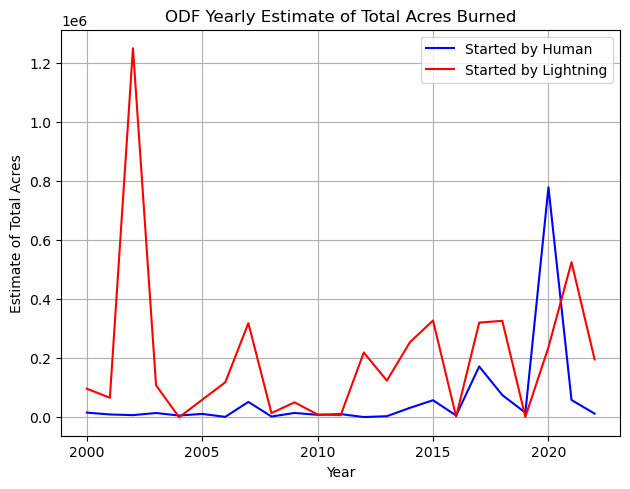

In [116]:
# Create a line plot for both types of fire - started by lightning vs started by human
plt.plot(human.index, human, color='blue', label='Started by Human')
plt.plot(light.index, light, color='red', label='Started by Lightning')
plt.legend()
plt.title("ODF Yearly Estimate of Total Acres Burned")
plt.ylabel("Estimate of Total Acres")
plt.grid()
plt.tight_layout()
plt.xlabel("Year")
plt.savefig('ODF Yearly Estimate of Total Acres Burned.pdf')